# Default of credit card clients predictive models

In [1]:
#importiong required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('default of credit card clients.xls', header =1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
#Checking the dataset Distribution
data['default payment next month'].value_counts()/len(data)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [20]:
#Separating dependent and independent variables
x = data.drop(columns = ['default payment next month'])
y = data['default payment next month'].values.reshape(-1,1)

In [14]:
# Scaling the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [21]:
# splitiing the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_x, y, train_size = 0.8)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24000, 24), (6000, 24), (24000, 1), (6000, 1))

In [22]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [23]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

In [25]:
predicted_values

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [26]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.5356574 , 0.4643426 ],
        [0.70180907, 0.29819093],
        [0.5127841 , 0.4872159 ],
        ...,
        [0.21360259, 0.78639741],
        [0.46722875, 0.53277125],
        [0.6990166 , 0.3009834 ]]),
 (6000, 2))

In [27]:
#Accuracy
classifier.score(x_test, y_test)

0.6888333333333333

The model is 68% accurate

In [29]:
# calculating precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, predicted_values)
precision

0.3817106460418562

In [30]:
# Caluculating the recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, predicted_values)
recall

0.6228656273199703

In [31]:
#calculating f_score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predicted_values)
f1

0.4733427362482369

In [34]:
#calculating precision, recall, f1, supoort scores at a time
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)
precision, recall, f1, support

(array([0.86638611, 0.38171065]),
 array([0.70793037, 0.62286563]),
 array([0.77918391, 0.47334274]),
 array([4653, 1347], dtype=int64))

In [35]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4653
           1       0.38      0.62      0.47      1347

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000



In [48]:
# Gathering precision or recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape

(5990,)

In [47]:
recall_points.shape

(5990,)

In [46]:
threshold_points.shape

(5989,)

No handles with labels found to put in legend.


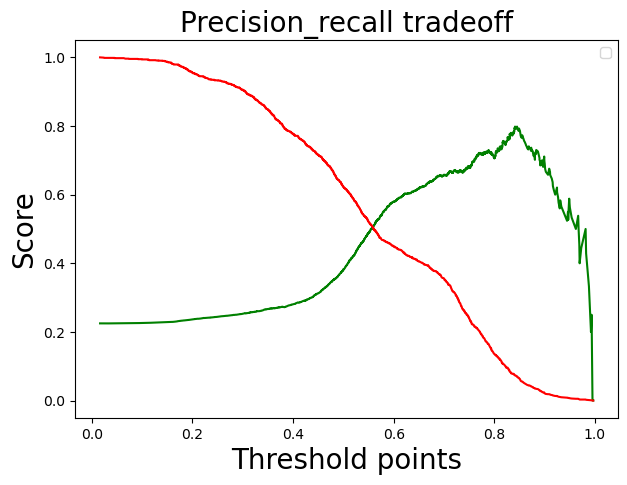

In [49]:
#plotting precision and recall
plt.figure(figsize = (7,5), dpi =100)
plt.plot(threshold_points, precision_points[:-1], color='green')
plt.plot(threshold_points, recall_points[:-1], color='red')
plt.xlabel('Threshold points', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.title('Precision_recall tradeoff', fontsize = 20)
plt.legend()

# AUC_ROC Curve

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:, 1])

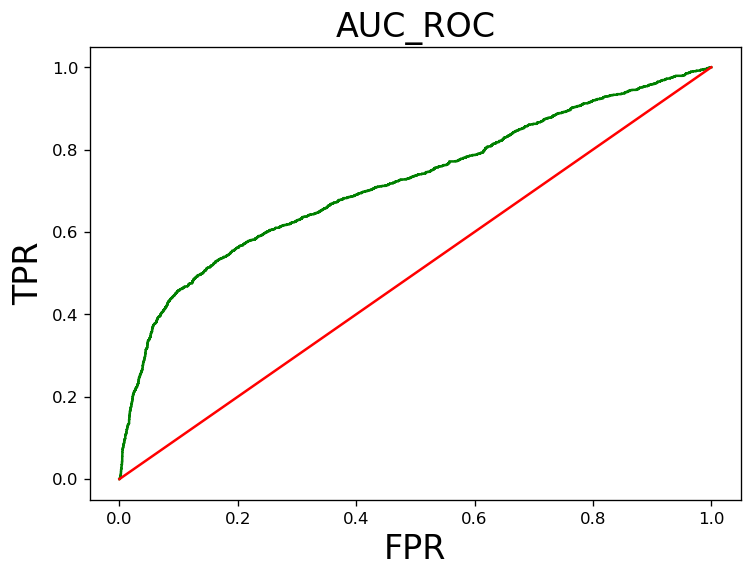

0.71821278701817

In [55]:
#Plotting auc_roc curve
plt.figure(figsize = (7,5), dpi =120)
plt.plot(fpr, tpr, color ='green')
plt.plot([0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 20)
plt.ylabel('TPR', fontsize = 20)
plt.title('AUC_ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

In [58]:
#coefficient plot
#Arranging the data
c = classifier.coef_.reshape(-1)
x = x.columns
coeff_plot = pd.DataFrame({'Coefficients':1,
                          'variables': x})

In [59]:
# SOrting the values
coeff_plot = coeff_plot.sort_values(by ='Coefficients')
coeff_plot.head()

,Coefficients,variables
0,1,ID
21,1,PAY_AMT4
20,1,PAY_AMT3
19,1,PAY_AMT2
18,1,PAY_AMT1


Text(0.5, 1.0, 'coefficients plot')

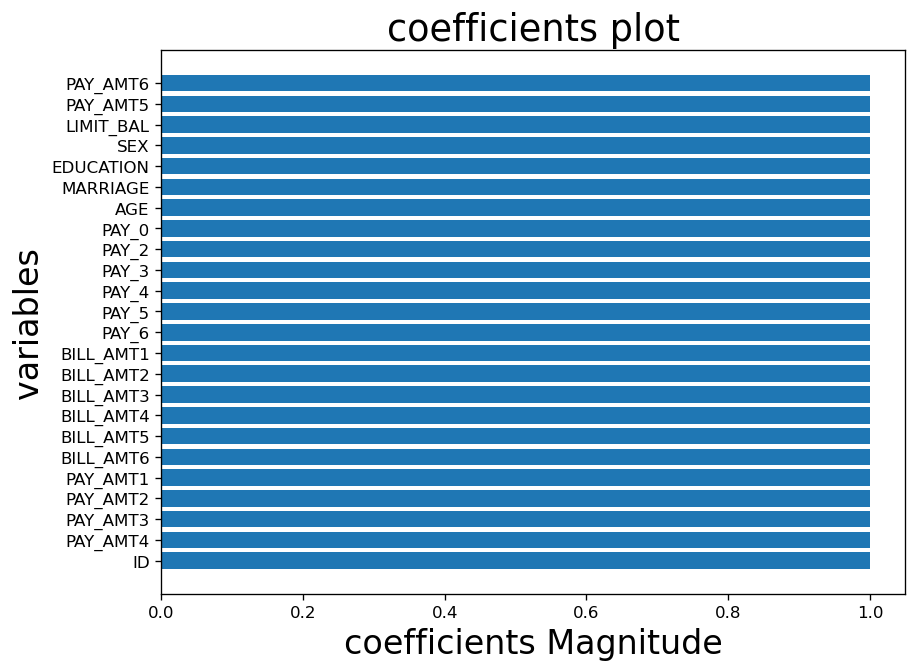

In [63]:
#plotting
plt.figure(figsize = (8,6), dpi =120)
plt.barh(coeff_plot['variables'], coeff_plot['Coefficients'])
plt.xlabel("coefficients Magnitude", fontsize = 20)
plt.ylabel("variables", fontsize =20)
plt.title("coefficients plot", fontsize = 22)

In [61]:
# Importind DEcision tree algorithm from sklearn library
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()

# Feature Importance

In [65]:
model = DTC( max_depth =9)
model.fit(x_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index = x)
k = feature_importance.sort_values()

Text(0.5, 1.0, 'Feature Importance')

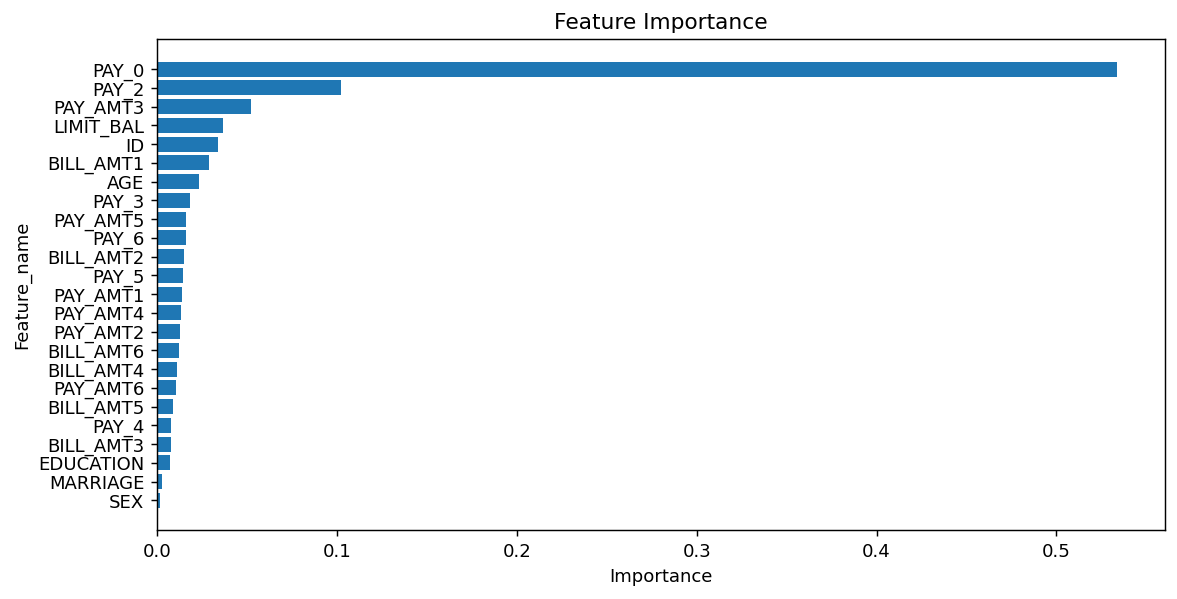

In [66]:
#plotting feature importance
plt.figure(figsize =(10,5), dpi =130)
plt.barh(k.index, k)
plt.xlabel('Importance')
plt.ylabel('Feature_name')
plt.title('Feature Importance')

In [105]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = data['default payment next month']
x = scaler.fit_transform(data.drop(columns = ['default payment next month', 'ID']))
x = pd.DataFrame(data = x, columns = data.drop(columns = ['default payment next month', 'ID']).columns)

# Correlation matrix

In [106]:
numeric_columns = data.drop(columns = ['default payment next month', 'ID'])
correlation = numeric_columns.corr()

In [107]:
correlation

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


In [108]:
k = correlation
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z, len(z)

([['PAY_0', 'PAY_2'],
  ['PAY_0', 'PAY_3'],
  ['PAY_0', 'PAY_4'],
  ['PAY_0', 'PAY_5'],
  ['PAY_2', 'PAY_0'],
  ['PAY_2', 'PAY_3'],
  ['PAY_2', 'PAY_4'],
  ['PAY_2', 'PAY_5'],
  ['PAY_2', 'PAY_6'],
  ['PAY_3', 'PAY_0'],
  ['PAY_3', 'PAY_2'],
  ['PAY_3', 'PAY_4'],
  ['PAY_3', 'PAY_5'],
  ['PAY_3', 'PAY_6'],
  ['PAY_4', 'PAY_0'],
  ['PAY_4', 'PAY_2'],
  ['PAY_4', 'PAY_3'],
  ['PAY_4', 'PAY_5'],
  ['PAY_4', 'PAY_6'],
  ['PAY_5', 'PAY_0'],
  ['PAY_5', 'PAY_2'],
  ['PAY_5', 'PAY_3'],
  ['PAY_5', 'PAY_4'],
  ['PAY_5', 'PAY_6'],
  ['PAY_6', 'PAY_2'],
  ['PAY_6', 'PAY_3'],
  ['PAY_6', 'PAY_4'],
  ['PAY_6', 'PAY_5'],
  ['BILL_AMT1', 'BILL_AMT2'],
  ['BILL_AMT1', 'BILL_AMT3'],
  ['BILL_AMT1', 'BILL_AMT4'],
  ['BILL_AMT1', 'BILL_AMT5'],
  ['BILL_AMT1', 'BILL_AMT6'],
  ['BILL_AMT2', 'BILL_AMT1'],
  ['BILL_AMT2', 'BILL_AMT3'],
  ['BILL_AMT2', 'BILL_AMT4'],
  ['BILL_AMT2', 'BILL_AMT5'],
  ['BILL_AMT2', 'BILL_AMT6'],
  ['BILL_AMT3', 'BILL_AMT1'],
  ['BILL_AMT3', 'BILL_AMT2'],
  ['BILL_AMT3', 'BILL_AM

In [111]:
# Calucating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = x
vif_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [114]:
# Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index = vif_data.columns)

In [115]:
VIF[VIF ==VIF.max()].index[0]

'BILL_AMT2'

In [116]:
def mc_remover(data):
    VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
    
    if VIF.max()>5:
        print(VIF[VIF == VIF.max()].index[0], 'has been removed')
        data = data.drop(columns = [VIF[VIF == VIF.max()].index[0]])
        
        return data
    else:
        print('No Multicollinearity is present')
        return data

In [117]:
for i in range(7):
    vif_data = mc_remover(vif_data)
    vif_data.head()

BILL_AMT2 has been removed
BILL_AMT5 has been removed
BILL_AMT3 has been removed
BILL_AMT4 has been removed
No Multicollinearity is present
No Multicollinearity is present
No Multicollinearity is present


In [118]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(LIMIT_BAL    1.552928
 SEX          1.023784
 EDUCATION    1.125588
 MARRIAGE     1.230016
 AGE          1.275056
 PAY_0        1.919207
 PAY_2        3.168519
 PAY_3        3.635258
 PAY_4        4.274782
 PAY_5        4.704730
 PAY_6        3.247593
 BILL_AMT1    3.131387
 BILL_AMT6    3.593371
 PAY_AMT1     1.206116
 PAY_AMT2     1.184269
 PAY_AMT3     1.203640
 PAY_AMT4     1.172402
 PAY_AMT5     1.202260
 PAY_AMT6     1.138352
 dtype: float64,
 19)

In [131]:
x = vif_data
y = data['default payment next month'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 56)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
    

((22500, 19), (7500, 19), (22500, 1), (7500, 1))

# RandomForest classifier

In [132]:
from sklearn.ensemble import BaggingClassifier as BC
classifier = BC()
classifier.fit(x_train, y_train)

BaggingClassifier()

In [133]:
from sklearn.linear_model import LogisticRegression as LR
classifier = BC(base_estimator = LR(),
               n_estimators = 350, 
               n_jobs = -1,
               random_state = 56)
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_train)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     17482
           1       0.72      0.26      0.38      5018

    accuracy                           0.81     22500
   macro avg       0.77      0.61      0.63     22500
weighted avg       0.80      0.81      0.78     22500



In [135]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5882
           1       0.68      0.24      0.36      1618

    accuracy                           0.81      7500
   macro avg       0.75      0.61      0.63      7500
weighted avg       0.79      0.81      0.78      7500



In [136]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [137]:
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [138]:
predicted_values = classifier.predict(x_test)

In [139]:
predicted_probabilities = classifier.predict_proba(x_test)

In [140]:
roc_auc_score(y_test, predicted_probabilities[:,1])

0.7673873256870072

We got roc_auc_score under RandomForest Classifier as 0.767